In [22]:
#importar as blibliocas usadas para o codigo
import pandas as pd  
import matplotlib.pyplot as plt 
# Covariâncias entre valores
from statsmodels.graphics.tsaplots import plot_acf  
# Covariâncias entre valores
from statsmodels.graphics.tsaplots import plot_pacf 
# Modelo ARIMA
from statsmodels.tsa.arima_model import ARIMA  
# Teste de estacionariedade
from statsmodels.tsa.stattools import adfuller 

import warnings  
warnings.filterwarnings('ignore')

In [10]:
#dataframe 
data = pd.read_excel('/content/Dados.xlsx')
data1 = pd.read_excel('/content/Dados.xlsx')

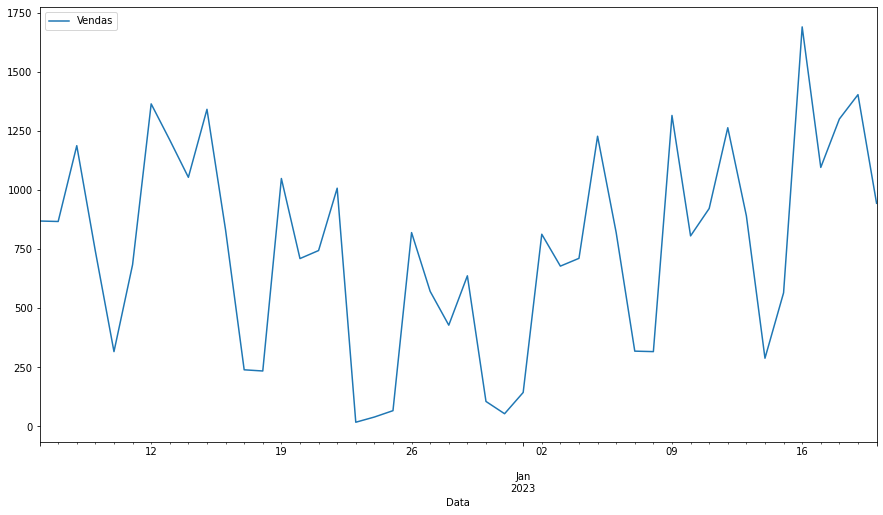

In [11]:
# Plot da série para visualizar a sazonalidade e tendência do grafico
df = pd.DataFrame(data, columns = ['Data', 'Vendas'])
df['Data'] = pd.to_datetime(df['Data'])
df.index = df['Data']
del df['Data']
df.plot(figsize=(15, 8))
plt.show()


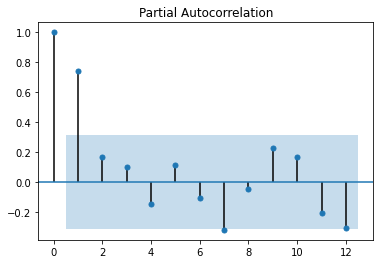

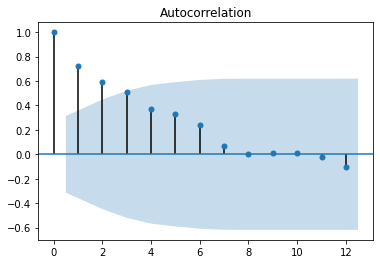

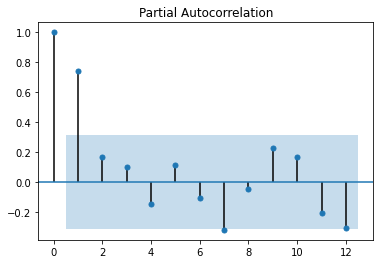

In [12]:

#  ACF e PACF da série para calcular a diferença sazonal de 7 dias.
data['Vendas'] = data['Vendas'].diff(7)
data = data.drop([0,1, 2, 3, 4, 5, 6], axis=0).reset_index(drop=True)
plot_acf(data.Vendas,lags=12)
plot_pacf(data.Vendas,lags=12)

                              ARMA Model Results                              
Dep. Variable:                 Vendas   No. Observations:                   39
Model:                     ARMA(1, 0)   Log Likelihood                -264.684
Method:                       css-mle   S.D. of innovations            212.372
Date:                Sat, 04 Feb 2023   AIC                            535.369
Time:                        02:18:41   BIC                            540.360
Sample:                             0   HQIC                           537.160
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           51.8712    115.878      0.448      0.654    -175.245     278.988
ar.L1.Vendas     0.7236      0.106      6.809      0.000       0.515       0.932
                                    Roots   

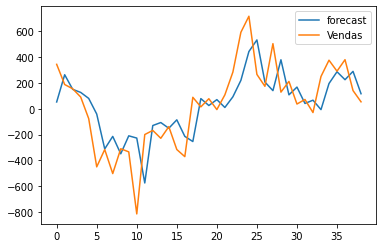

In [13]:
# Modelagem como um modelo ARMA(1,0) com uma diferença sazonal e comparação deste modelo com a série real
arima = ARIMA(data.Vendas,order=(1,0,0))
model = arima.fit()
print(model.summary())
model.plot_predict(dynamic=False)
plt.show()

1.5904891971184195e-09


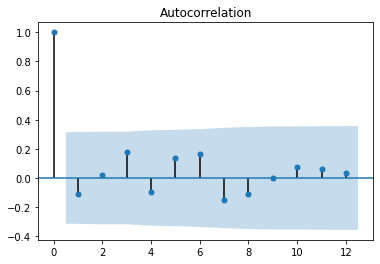

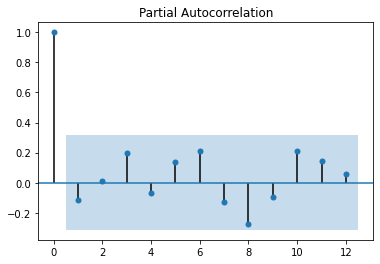

In [24]:
# Checagem se os erros satisfazem as pressuposições do modelo
derro = data['Vendas'] - model.fittedvalues
plot_acf(derro,lags=12)
plot_pacf(derro,lags=12)
teste = adfuller(derro)
print(teste[1])


In [25]:
# Realização da previsão retornando os dados sem a diferença sazonal
prevdif = [model.predict(start=1,end=5)[1],model.predict(start=1,end=5)[2],model.predict(start=1,end=5)[3],model.predict(start=1,end=5)[4],model.predict(start=1,end=5)[5]]
previsão =  data1['Vendas'][39:44] + prevdif


In [28]:
print(previsão) 
#O modelo ARIMA retornou os numeros originais, devido a aplicação do diferencial sazonal.
#Como resultado temos os seguintes numeros da previsão de 5 dias de vendas.
#21/1 551, 22/1 715, 23/7 1817, 24/1 1176, 25/1 1260.


39     551.524949
40     715.647128
41    1817.769128
42    1176.460278
43    1260.623124
Name: Vendas, dtype: float64
